In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re


In [2]:
Hiro = pd.read_csv("D:/NU/Semester 7/AIS411 NLP/Project/HieroGlyphTranslator/aligned_train_egy.csv") 
Hiro


,wA .f r tr n rqt
0,nsw bjtj aA xpr kA ra
1,Hr .w rs m gwAyt
2,jw n .j sp 2 m Htp sAt bnrt jmt jb .j
3,aHa rDj pA wr n bxtn jn .tw jnw .f
4,nt xr nsw
...,...
10344,SfSft m jdbw HAw nbwt
10345,kfa .j n .f m kS
10346,shA .n .j jmw ky
10347,sHw .n .s xAswt nt gs .sj


In [3]:
Hiro.describe(include='all')


,wA .f r tr n rqt
count,10349
unique,6550
top,Dd .j n m mjn
freq,36


In [4]:
Hiro["tokens"] = Hiro["wA .f r tr n rqt"].apply(lambda x: x.split())
all_symbols = Hiro["tokens"].explode()
unique_symbols = all_symbols.unique()

print("Total unique symbols:", len(unique_symbols))
print(unique_symbols[:20])


Total unique symbols: 2647
['nsw' 'bjtj' 'aA' 'xpr' 'kA' 'ra' 'Hr' '.w' 'rs' 'm' 'gwAyt' 'jw' 'n'
 '.j' 'sp' '2' 'Htp' 'sAt' 'bnrt' 'jmt']


In [5]:
Hiro["num_symbols"] = Hiro["tokens"].apply(len)
Hiro["num_symbols"].describe()


count    10349.000000
mean         5.644410
std          2.530819
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         27.000000
Name: num_symbols, dtype: float64

In [6]:
engl = pd.read_csv("D:/NU/Semester 7/AIS411 NLP/Project/HieroGlyphTranslator/aligned_train_eng.csv")  
engl

,who was preparing a period of hostility
0,the king of upper and lower egypt aakheperkare
1,ready for battle in a narrow defile
2,be very welcome to me in peace sweet daughter ...
3,then the prince of bakhtan had his gifts sent
4,from the king
...,...
10344,the awe is in the aegean lands
10345,i captured for him in kush
10346,i made the ship of another descend
10347,and had gathered its neighbouring lands


In [7]:
engl["eng_len"] = engl["who was preparing a period of hostility"].apply(lambda x: len(x.split()))
engl["eng_len"].describe()


count    10349.000000
mean         6.617837
std          2.924702
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         34.000000
Name: eng_len, dtype: float64

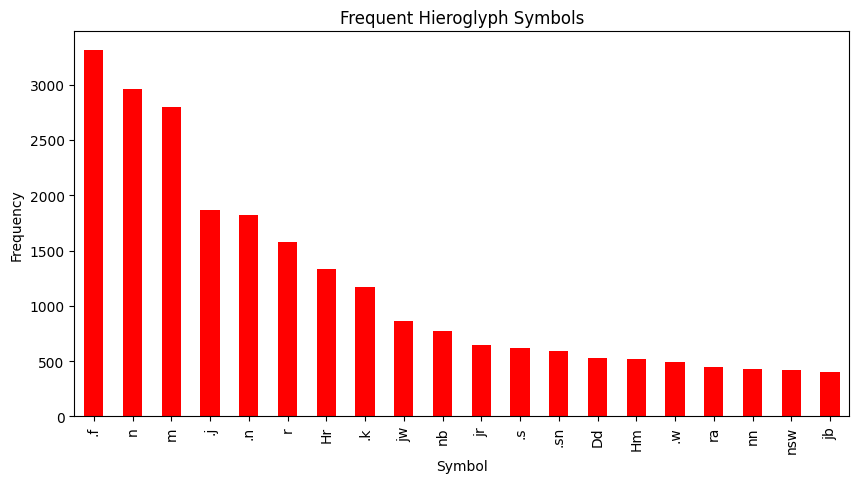

In [11]:
symbol_freq = all_symbols.value_counts().head(20)
symbol_freq.plot(kind='bar', figsize=(10,5) , color = "red")
plt.title("Frequent Hieroglyph Symbols")
plt.xlabel("Symbol")
plt.ylabel("Frequency")
plt.show()


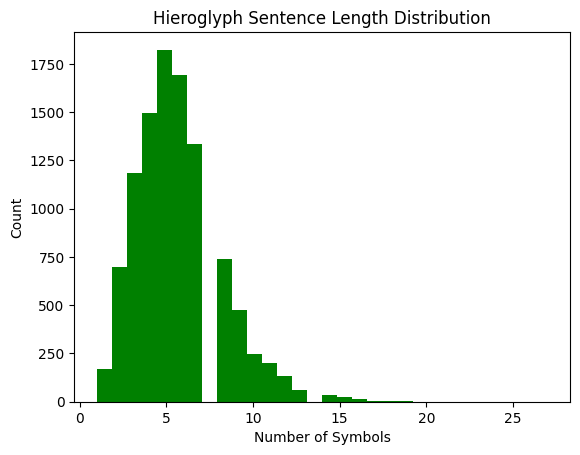

In [12]:
plt.hist(Hiro["num_symbols"], bins=30, color='green')
plt.title("Hieroglyph Sentence Length Distribution")
plt.xlabel("Number of Symbols")
plt.ylabel("Count")
plt.show()


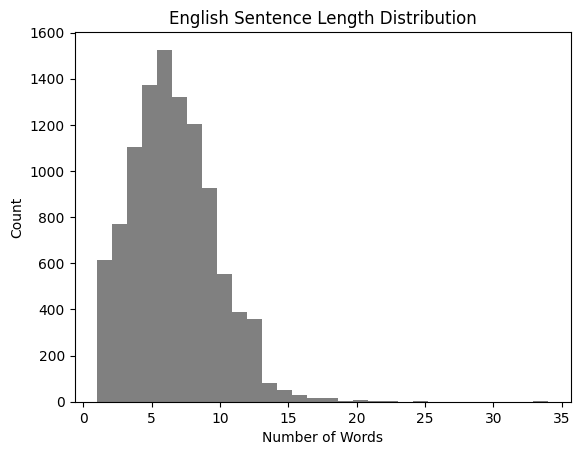

In [13]:
plt.hist(engl["eng_len"], bins=30 , color='gray')
plt.title("English Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()


In [14]:
Hiro["tokens"] = Hiro["wA .f r tr n rqt"].apply(lambda x: x.strip().split())

In [15]:
encoder = LabelEncoder()
encoder.fit(unique_symbols)
Hiro["encoded"] = Hiro["tokens"].apply(lambda x: encoder.transform(x))


In [16]:
max_len = Hiro["encoded"].apply(len).max()
X = pad_sequences(Hiro["encoded"], maxlen=max_len, padding='post')

In [17]:
def clean_english(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

engl["clean_eng"] = engl["who was preparing a period of hostility"].apply(clean_english)


In [18]:
tokenizer_eng = Tokenizer()
tokenizer_eng.fit_on_texts(engl["clean_eng"])

Y = tokenizer_eng.texts_to_sequences(engl["clean_eng"])
Y = pad_sequences(Y, padding='post')



In [19]:
engl

,who was preparing a period of hostility,eng_len,clean_eng
0,the king of upper and lower egypt aakheperkare,8,the king of upper and lower egypt aakheperkare
1,ready for battle in a narrow defile,7,ready for battle in a narrow defile
2,be very welcome to me in peace sweet daughter ...,14,be very welcome to me in peace sweet daughter ...
3,then the prince of bakhtan had his gifts sent,9,then the prince of bakhtan had his gifts sent
4,from the king,3,from the king
...,...,...,...
10344,the awe is in the aegean lands,7,the awe is in the aegean lands
10345,i captured for him in kush,6,i captured for him in kush
10346,i made the ship of another descend,7,i made the ship of another descend
10347,and had gathered its neighbouring lands,6,and had gathered its neighbouring lands


In [29]:
Hiro.head()

,wA .f r tr n rqt,tokens,num_symbols,encoded
0,nsw bjtj aA xpr kA ra,"[nsw, bjtj, aA, xpr, kA, ra]",6,"[1567, 759, 604, 2593, 1207, 1750]"
1,Hr .w rs m gwAyt,"[Hr, .w, rs, m, gwAyt]",5,"[333, 31, 1796, 1253, 925]"
2,jw n .j sp 2 m Htp sAt bnrt jmt jb .j,"[jw, n, .j, sp, 2, m, Htp, sAt, bnrt, jmt, jb,...",12,"[1164, 1431, 7, 2095, 57, 1253, 369, 1843, 768..."
3,aHa rDj pA wr n bxtn jn .tw jnw .f,"[aHa, rDj, pA, wr, n, bxtn, jn, .tw, jnw, .f]",10,"[626, 1743, 1607, 2454, 1431, 794, 1073, 27, 1..."
4,nt xr nsw,"[nt, xr, nsw]",3,"[1575, 2599, 1567]"
